## Personal Project

The [COVID19 data](https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university) for this project comes from Kaggle. The data covers:

- confirmed cases and deaths on a country level
- confirmed cases and deaths by US county. 

### Outline: 

I. Introduction <br>
II. Data Cleaning <br>
III. Exploratory Analysis <br> 

# I. Introduction

Coronavirus disease (COVID-19) is an infectious disease started in 2019. Since today, there has been 57,831,336 cases and 1,375,861 death. If we can understand the relationship between case and death, it will help us eliminate it. On top of that, if we can predict death from cases, then it will help us understand roughly how much time we have to deal with the virus. In this project, we will try to understand their relationship. 

In [90]:
# Import libraries necessary for this project
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

# Import supplementary visualizations code visuals.py
#from IPython.display import display

# Pretty display for notebooks
%matplotlib inline

os.chdir('C:/Users/Moo Moo Yang/Documents/Learning/Personal_projects/COVID19/Raw_data')

# Load the wholesale customers dataset
df_global_case = pd.read_csv("CONVENIENT_global_confirmed_cases.csv")
df_global_death = pd.read_csv("CONVENIENT_global_deaths.csv")

In [2]:
# remove the first row since it's Nan for both datasets

df_global_case = df_global_case.iloc[1:, :]
df_global_death = df_global_death.iloc[1:, :]

In [3]:
# check what raw data looks like
df_global_case.tail(5)

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
295,11/12/20,186.0,410.0,851.0,49.0,100.0,0.0,11163.0,2132.0,0.0,...,95.0,163.0,0.0,390.0,1.0,719.0,0.0,0.0,20.0,29.0
296,11/13/20,174.0,490.0,867.0,109.0,175.0,2.0,11859.0,1703.0,0.0,...,88.0,194.0,0.0,301.0,3.0,730.0,0.0,1.0,37.0,69.0
297,11/14/20,66.0,532.0,844.0,0.0,146.0,1.0,8468.0,1472.0,0.0,...,74.0,233.0,0.0,492.0,9.0,653.0,0.0,0.0,4.0,21.0
298,11/15/20,205.0,597.0,860.0,147.0,77.0,0.0,5645.0,1482.0,0.0,...,73.0,256.0,0.0,419.0,16.0,864.0,0.0,0.0,26.0,43.0
299,11/16/20,163.0,602.0,910.0,42.0,164.0,0.0,7893.0,549.0,0.0,...,74.0,138.0,0.0,387.0,2.0,836.0,0.0,6.0,64.0,68.0


In [4]:
df_global_death.tail(5)

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
295,11/12/20,10.0,8.0,18.0,0.0,3.0,0.0,251.0,32.0,0.0,...,0.0,2.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0
296,11/13/20,4.0,7.0,13.0,0.0,2.0,0.0,263.0,29.0,0.0,...,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0
297,11/14/20,10.0,7.0,15.0,0.0,5.0,1.0,262.0,41.0,0.0,...,0.0,0.0,0.0,4.0,0.0,10.0,0.0,0.0,0.0,0.0
298,11/15/20,12.0,11.0,15.0,1.0,0.0,0.0,129.0,25.0,0.0,...,1.0,4.0,0.0,3.0,0.0,7.0,0.0,0.0,3.0,0.0
299,11/16/20,9.0,8.0,14.0,0.0,2.0,0.0,291.0,25.0,0.0,...,2.0,0.0,0.0,4.0,0.0,7.0,0.0,0.0,0.0,0.0


In [5]:
df_global_case.describe()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,145.160535,95.090301,229.394649,19.779264,45.535117,0.448161,4409.311037,394.267559,697.702341,257.802676,...,13.725753,235.387960,0.003344,326.886288,4.290970,213.602007,0.033445,6.949833,57.481605,29.755853
std,205.211254,120.426181,207.764543,47.477633,72.712276,2.454927,5076.644842,568.310148,1596.444841,351.328864,...,17.378293,240.012311,0.057831,374.109000,7.983978,242.164648,0.315514,12.996934,102.072988,58.851684
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,-21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-6.000000
25%,7.500000,9.000000,88.000000,0.000000,0.000000,0.000000,88.000000,36.000000,33.000000,38.000000,...,2.000000,24.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,55.000000,174.000000,0.000000,6.000000,0.000000,1958.000000,189.000000,110.000000,131.000000,...,8.000000,163.000000,0.000000,157.000000,1.000000,54.000000,0.000000,1.000000,9.000000,6.000000
75%,173.000000,140.500000,356.500000,14.000000,59.000000,0.000000,8449.500000,485.500000,525.500000,352.000000,...,18.000000,397.000000,0.000000,617.000000,4.500000,413.500000,0.000000,9.500000,71.500000,29.000000
max,915.000000,602.000000,910.000000,299.000000,355.000000,39.000000,18326.000000,2476.000000,9586.000000,2259.000000,...,95.000000,981.000000,1.000000,1281.000000,50.000000,888.000000,4.000000,116.000000,915.000000,490.000000


In [6]:
df_global_death.describe()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.0,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,5.438127,2.110368,7.250836,0.254181,1.083612,0.013378,119.488294,5.979933,6.311037,3.294314,...,0.224080,2.000000,0.0,2.859532,0.117057,1.913043,0.003344,2.023411,1.180602,0.859532
std,8.154878,2.402011,5.205246,0.725107,1.717370,0.115079,234.668385,7.765843,12.609264,4.199752,...,0.477643,2.389856,0.0,3.231608,0.494612,2.780408,0.057831,5.001623,4.832860,2.468663
min,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,...,0.000000,0.000000,0.0,-6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,8.000000,0.000000,0.000000,0.000000,27.000000,3.000000,1.000000,2.000000,...,0.000000,1.000000,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,4.000000,10.000000,0.000000,2.000000,0.000000,201.000000,8.000000,6.000000,5.000000,...,0.000000,4.000000,0.0,5.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000
max,46.000000,12.000000,30.000000,6.000000,12.000000,1.000000,3351.000000,41.000000,85.000000,22.000000,...,2.000000,8.000000,0.0,12.000000,3.000000,14.000000,1.000000,52.000000,67.000000,18.000000


# II. Data Cleaning 

There are countries with multiple regions in the dataset. We will collapse them all into one column per country. We will do this for both the case and death datasets. 

In [7]:
# find countries with multiple regions
multiple_list = df_global_case.columns[df_global_case.columns.str.match("^.*\\d$")==True]
dup_countries = multiple_list.str.split('.').str[0].unique()
dup_countries

Index(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'United Kingdom'],
      dtype='object')

In [8]:
#df_global_death.iloc[:,10] = df_global_death.iloc[:,10].astype('float64')
df_global_case_collapsed = df_global_case.loc[:,df_global_case.columns[df_global_case.columns.str.match("^.*\\d$")==False]]
df_global_death_collapsed = df_global_death.loc[:,df_global_death.columns[df_global_death.columns.str.match("^.*\\d$")==False]]

for i in dup_countries: 
    df_global_case_collapsed.loc[:,i] = df_global_death.filter(like=i).astype(float).sum(axis=1)
    df_global_death_collapsed.loc[:,i] = df_global_death.filter(like=i).astype(float).sum(axis=1)

In [9]:
# change the first column to date since it's incorrectly labeled 
df_global_case_collapsed.rename(columns = {'Country/Region':'Date'}, inplace = True) 
df_global_death_collapsed.rename(columns = {'Country/Region':'Date'}, inplace = True) 

There are countries with negative death and cases. After careful consideration, negative cases could mean they are healed, but the negative death doesn't make sense. The data dictionary contains no information on them, but we will change the negative death to 0 instead. It's entirely possible that the negative sign is a typo, we will just make a note here and it will be easy to modify if we found out that's the case. 

In [10]:
#df_global_death_collapsed[(df_global_death_collapsed.iloc[:,1:] > 0).all(1)]
#num[(num.iloc[:,2:10] < 0).all(1)]

#for cols in num.columns.tolist()[1:]:
#    num = num.iloc[:, num[cols] < 0]

df_global_death_collapsed
# making boolean series for a team name 
#df_global_death_collapsed.iloc[:,1:] < 0
  
# filtering data 
#df_global_death_collapsed.where(filter, inplace = True) 
#df_global_death_collapsed

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,11/12/20,10.0,8.0,18.0,0.0,3.0,0.0,251.0,32.0,0.0,...,0.0,2.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0
296,11/13/20,4.0,7.0,13.0,0.0,2.0,0.0,263.0,29.0,0.0,...,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0
297,11/14/20,10.0,7.0,15.0,0.0,5.0,1.0,262.0,41.0,0.0,...,0.0,0.0,0.0,4.0,0.0,10.0,0.0,0.0,0.0,0.0
298,11/15/20,12.0,11.0,15.0,1.0,0.0,0.0,129.0,25.0,0.0,...,1.0,4.0,0.0,3.0,0.0,7.0,0.0,0.0,3.0,0.0


# III. Exploratory Analysis

The most useful exploratory analysis on COVID19 cases and death is a line plot showing the trend, but it is difficult as there are multiple countries. It would be nice to have an interactive dashboard with the option of selecting the country to display the information. The following information are also valuable: 
- Range of cases
- Range of death
- correlation between case and death. 

Before that, let's collapse the information to get cross-sectional information on the datasets first. We will first find: 
1. Time period with highest increase of cases and death
2. Time period with highest decrease of cases and death. 


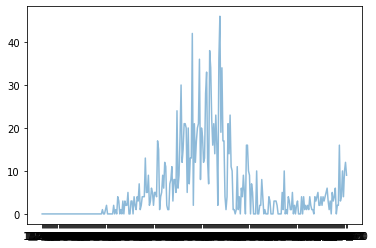

In [11]:
#df_global_death.iloc[:,0]
plt.plot(df_global_death_collapsed.iloc[:,0], df_global_death.iloc[:,1], alpha=0.5)

In [50]:
#df_global_death_collapsed= df_global_death_collapsed.set_index('date')#.diff()
#df_global_death.date <- set_index(_n_)
#df_global_death.iloc[:,1:].diff()
#df_global_case.set_index('Date').diff()

In [51]:
# create case difference  
global_case_diff = pd.concat([df_global_case_collapsed.iloc[:,0], df_global_case_collapsed.iloc[:,1:192].diff()], axis=1)
global_death_diff = pd.concat([df_global_death_collapsed.iloc[:,0], df_global_death_collapsed.iloc[:,1:192].diff()], axis=1)
global_case_diff.head()

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1,1/23/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The first row are all NaN because the difference table calculates the difference between rows, and we need a previous row for the calculation. 

In [14]:
# create new data to store dates
new_data = pd.DataFrame(global_case_diff.columns)
new_data.columns = ['Country']
new_data = new_data.iloc[1:, :]
new_data['Min_date_case'] = ''
new_data['Decrement_case'] = ''
new_data['Max_date_case'] = ''
new_data['Increment_case'] = ''
new_data['Min_date_death'] = ''
new_data['Decrement_death'] = ''
new_data['Max_date_death'] = ''
new_data['Increment_death'] = ''
new_data

,Country,Min_date_case,Decrement_case,Max_date_case,Increment_case,Min_date_death,Decrement_death,Max_date_death,Increment_death
1,Afghanistan,,,,,,,,
2,Albania,,,,,,,,
3,Algeria,,,,,,,,
4,Andorra,,,,,,,,
5,Angola,,,,,,,,
...,...,...,...,...,...,...,...,...,...
187,West Bank and Gaza,,,,,,,,
188,Western Sahara,,,,,,,,
189,Yemen,,,,,,,,
190,Zambia,,,,,,,,


In [15]:
# find index of highest drop and highest increase of cases and death for each country
min_index_case = global_case_diff.iloc[:,1:].idxmin(axis=0, skipna=True)
max_index_case = global_case_diff.iloc[:,1:].idxmax(axis=0, skipna=True)
min_index_death = global_death_diff.iloc[:,1:].idxmin(axis=0, skipna=True)
max_index_death = global_death_diff.iloc[:,1:].idxmax(axis=0, skipna=True)

# create a variable for number of countries
num_countries = global_case_diff.shape[1] - 1 # one of them is date

for i in range(num_countries):
    new_data.iloc[i, 1] = global_case_diff.iloc[min_index_case[i]-1,0]
    new_data.iloc[i, 2] = global_case_diff.iloc[min_index_case[i]-1,i+1]
    new_data.iloc[i, 3] = global_case_diff.iloc[max_index_case[i]-1,0]
    new_data.iloc[i, 4] = global_case_diff.iloc[max_index_case[i]-1,i+1]
    new_data.iloc[i, 5] = global_case_diff.iloc[min_index_death[i]-1,0]
    new_data.iloc[i, 6] = global_case_diff.iloc[min_index_death[i]-1,i+1]
    new_data.iloc[i, 7] = global_case_diff.iloc[max_index_death[i]-1,0]
    new_data.iloc[i, 8] = global_case_diff.iloc[max_index_death[i]-1,i+1]
    #print(i)

new_data

In [47]:
# organize the pulled data to get some insights
new_data[["Min_month_case", "Min_day_case", "Min_year_case"]] = new_data["Min_date_case"].str.split("/", expand=True)
new_data[["Max_month_case", "Max_day_case", "Max_year_case"]] = new_data["Max_date_case"].str.split("/", expand=True)
new_data[["Min_month_death", "Min_day_death", "Min_year_death"]] = new_data["Min_date_death"].str.split("/", expand=True)
new_data[["Max_month_death", "Max_day_death", "Max_year_death"]] = new_data["Max_date_death"].str.split("/", expand=True)

# group the data by month for min/max change for case and death
min_m_case = (new_data.groupby('Min_month_case').Country.count()/new_data.shape[0]*100).round(2)
max_m_case = (new_data.groupby('Max_month_case').Country.count()/new_data.shape[0]*100).round(2)
min_m_death = (new_data.groupby('Min_month_death').Country.count()/new_data.shape[0]*100).round(2)
max_m_death = (new_data.groupby('Max_month_death').Country.count()/new_data.shape[0]*100).round(2)

data =pd.concat([min_m_case, max_m_case, min_m_death, max_m_death], axis=1)
month_percentage = pd.DataFrame(data)
month_percentage.columns = ['Min_month_percentage_case', 'Max_month_percentage_case', 
                            'Min_month_percentage_death', 'Max_month_percentage_death']
month_percentage.index.name = 'month'
month_percentage.index = month_percentage.index.astype(int)
month_percentage = month_percentage.sort_index()
month_percentage.reset_index(inplace=True)
month_percentage

# convert digits into month name
import calendar
month_percentage['month'] = month_percentage['month'].astype(int).apply(lambda x: calendar.month_abbr[x])
month_percentage = month_percentage.set_index('month')
month_percentage

# replace NA to 0 in dataset
month_percentage= month_percentage.fillna(0)
month_percentage

,Min_month_percentage_case,Max_month_percentage_case,Min_month_percentage_death,Max_month_percentage_death
month,,,,
Jan,0.00,0.00,7.85,7.85
Feb,0.52,0.52,0.52,0.52
Mar,3.66,5.24,3.66,4.71
Apr,9.95,9.42,13.61,10.47
May,8.90,8.90,7.85,7.33
Jun,8.90,8.90,8.90,8.90
Jul,10.47,8.90,10.99,13.61
Aug,8.90,8.38,9.42,7.85
Sep,8.38,7.85,10.47,7.85


We can see that the months with highest decrease and increase of cases are correlated, so are the detah. Based on the tables, we can see the top three months with: 
    - highest decrease of cases: November, October, and July  
    - highest increase of cases: November, October, and April
    - highest decrease of death: November, April, and July
    - highest increase of death: November, July, and April. 
    
The months with most changes are November, October, July and April. 

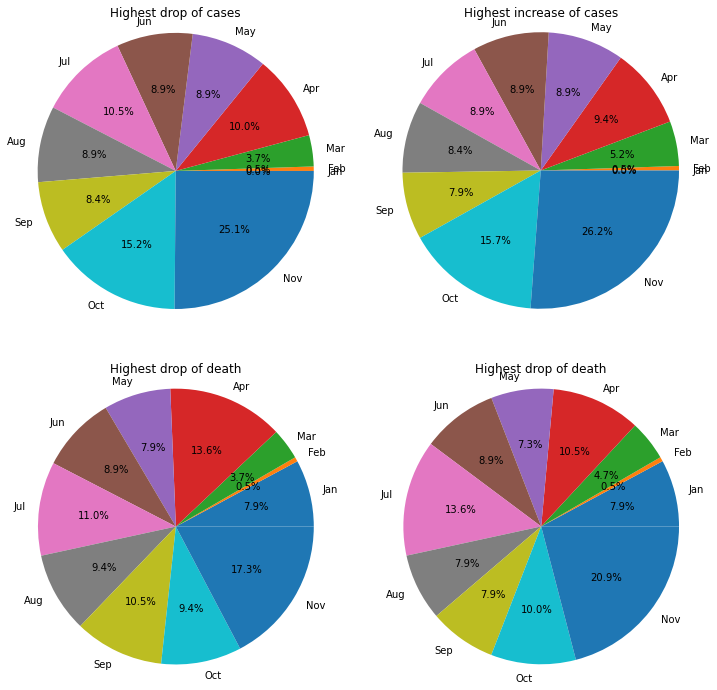

In [48]:
# plot the pie chart
#min_plot = month_percentage.plot.pie(y='Min_month_percentage', figsize=(5, 5))

# Make figure and axes
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.pie(month_percentage.Min_month_percentage_case,labels=month_percentage.index,autopct='%1.1f%%')
plt.title('Highest drop of cases')
plt.axis('equal')

plt.subplot(222)
plt.pie(month_percentage.Max_month_percentage_case,labels=month_percentage.index,autopct='%1.1f%%')
plt.title('Highest increase of cases')
plt.axis('equal')

plt.subplot(223)
plt.pie(month_percentage.Min_month_percentage_death,labels=month_percentage.index,autopct='%1.1f%%')
plt.title('Highest drop of death')
plt.axis('equal')

plt.subplot(224)
plt.pie(month_percentage.Max_month_percentage_death,labels=month_percentage.index,autopct='%1.1f%%')
plt.title('Highest drop of death')
plt.axis('equal')

plt.show()

#### Case

All data are in the year of 2020, and a quarter of the countries have the most decrease and increase of cases in November. It's less informative as it could mean that 1) a lot of countries has finally found a way to deal with COVID19 and it's under control, or 2) there's still high fluctuation of cases and it's difficult to determine what's actually going on. Based on current news, COVID19 is highly unpredictable and cases are increasing with relaxed policies for social gathering. In other words, the highest increase might be caused by people's lack of seriousness dealing with the virus, and the highest dorp of cases could be the result of a more strict policy in progress. Either way, this is like a cross-section of the disease and we should figure out the timing of these two events to understand what's actually happening. 

#### Death

Unlike cases, death fluctuates a lot. However, most drop of death occurred in November, April, July and September and the most increase of death occurred in November, July, and April.  


### Correlation between case and death 

In [53]:
df_global_case_collapsed

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,11/12/20,186.0,410.0,851.0,49.0,100.0,0.0,11163.0,2132.0,0.0,...,95.0,163.0,0.0,390.0,1.0,719.0,0.0,0.0,20.0,29.0
296,11/13/20,174.0,490.0,867.0,109.0,175.0,2.0,11859.0,1703.0,0.0,...,88.0,194.0,0.0,301.0,3.0,730.0,0.0,1.0,37.0,69.0
297,11/14/20,66.0,532.0,844.0,0.0,146.0,1.0,8468.0,1472.0,0.0,...,74.0,233.0,0.0,492.0,9.0,653.0,0.0,0.0,4.0,21.0
298,11/15/20,205.0,597.0,860.0,147.0,77.0,0.0,5645.0,1482.0,0.0,...,73.0,256.0,0.0,419.0,16.0,864.0,0.0,0.0,26.0,43.0


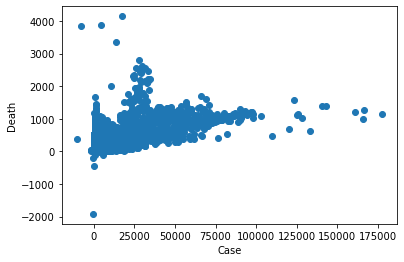

Pearsons correlation: 0.720


In [88]:
case_long = pd.melt(df_global_case_collapsed, id_vars=['Date'], value_vars=df_global_case_collapsed.columns[1:])
death_long = pd.melt(df_global_death_collapsed, id_vars=['Date'], value_vars=df_global_case_collapsed.columns[1:])
new_data_long = pd.concat([case_long, death_long], axis=1)
#new_data_long = case_long.merge(death_long, left_on = 'Date', right_on = 'Date')
new_data_long.columns = ['Date', 'Country', 'Case', 'Date1', 'Country1', 'Death']
new_data_long = new_data_long.loc[:, ['Date', 'Country', 'Case', 'Death']]
new_data_long

# get a scatterplot between case and death
plt.scatter(new_data_long.Case, new_data_long.Death)
plt.xlabel('Case')
plt.ylabel('Death')
plt.show()

# calculate Pearson's correlation
corr, _ = pearsonr(new_data_long.Case, new_data_long.Death)
print('Pearsons correlation: %.3f' % corr)

From the scatterplot, we can see that case and death are linearly correlated despite the outliers. The Pearson's correlation coefficient is 0.72, which means the linear relationship is positive with medium to high strength. To start, we can fit a simple linear regression to see the association between case and death. This is a crude analysis. 

In [95]:
# set parameters
X = pd.DataFrame(new_data_long.Case); y = pd.DataFrame(new_data_long.Death)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('The intercept is ', regressor.intercept_, ', and the slope is ', regressor.coef_)

The intercept is  [8.68221376] , and the slope is  [[0.01669037]]


In [ ]:
The model result showed that for every 

In [103]:
from sklearn import metrics
y_pred = regressor.predict(X_test)
print('Model Performance')
print('------------------')
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test,y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test,y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2))

Model Performance
------------------
Mean Absolute Error: 19.95
Mean Squared Error: 7483.86
Root Mean Squared Error: 86.51


As expected, the model performance aren't that good as there are many factors impact the relationship between case and death, which we couldn't take into account. 